### Probabilistic Machine Learning (Book 1)

Kevin P Murphy

#### Exercises, Chapter 2

In [7]:
import numpy as np
from matplotlib import pyplot as plt

**Exercise 2.1** [Conditional independence *] (Source: Koller.)

a. Let H $\in$ {1, . . . , K} be a discrete random variable, and let e1 and e2 be the observed values of two other random variables E1 and E2. Suppose we wish to calculate the vector

$\bf{P}$(H|e1,e2) = (P(H = 1|e1,e2),...,P(H = K|e1,e2))
Which of the following sets of numbers are sufficient for the calculation? 

i. P(e1,e2), P(H), P(e1|H), P(e2|H)

ii. P(e1,e2), P(H), P(e1,e2|H) 

iii. P(e1|H), P(e2|H), P(H)

b. Now suppose we now assume E1 ⊥ E2|H (i.e., E1 and E2 are conditionally independent given H). Which of the above 3 sets are sufficient now?

Show your calculations as well as giving the final result. Hint: use Bayes rule.

(a) We can calculate the elements of the vector $\mathbf{P}$ separately:

$\mathbf{P}(H|e_1,e_2) = (P_1, \ldots, P_K)^T = (P(H=1|e_1,e_2), \ldots P(H=K|e_1,e_2)),$

where each element can be calculated using Bayes' Rule, as:

$P_i = P(H=i|e_1,e_2) = \frac{P(H=i, e_1, e_2)}{P(e_1, e_2)}
                      = \frac{P(e_1, e_2|H=i)P(H=i)}{P(e_1, e_2)}.$
                      
Hence the set of numbers (ii.) is what is needed to calculate the elements of $\mathbf{P}$.

(b) If $e_1, e_2$ are conditionally independent given $H$, then

$P(e_1, e_2|H) = P(e_1|H)P(e_2|H),$ so that

$P_i = \frac{P(e_1|H=i)P(e_2|H=i)P(H=i)}{P(e_1, e_2)},$

so that now (i.) also gives the numbers needed to calculate the vector.  The set (iii.) still does not give enough information, as the joint distribution $P(e_1, e_2)$ is needed.

**Exercise 2.2** [Pairwise independence does not imply mutual independence] 

We say that two random variables are pairwise independent if

p(X2|X1) = p(X2) and hence

p(X2,X1) = p(X1)p(X2|X1) = p(X1)p(X2)

We say that n random variables are mutually independent if 

p(Xi|XS)=p(Xi) ∀S⊆{1,...,n}\\{i}

and hence

p(X1:n) = $\Pi_{i=1}^n$p(Xi)

Show that pairwise independence between all pairs of variables does not necessarily imply mutual independence.

It suffices to give a counter example.

To recap, if $X_1, X_2$ and $X_3$ are all pairwise independent, then

$P(X_2|X_1) = P(X_2),$

$P(X_3|X_1) = P(X_3),$

$P(X_3|X_2) = P(X_3),$

$P(X_1|X_2) = P(X_1),$

$P(X_1|X_3) = P(X_1).$

If the rvs were mutually independent then we would also have:

$P(X_1|X_2,X_3) = P(X_1),$ etc., so that the joint distribution would be the product of the marginals.

In general,

$P(X_1, X_2, X_3) = P(X_1|X_2, X_3)P(X_2, X_3) = P(X_1|X_2, X_3)P(X_2|X_3)P(X_3),$

which reduces to 

$P(X_1, X_2, X_3) = P(X_1| X_2, X_3)P(X_2)P(X_3)$

for the pairwise independent case.

But only for the mutually independent case do we have $P(X_1| X_2, X_3) = P(X_1)$ which allows the distributions to fully factorize.

**Exercise 2.3** [Conditional independence iff joint factorizes *]

In the text we said X ⊥ Y |Z iff
p(x, y|z) = p(x|z)p(y|z) (2.184)
for all x, y, z such that p(z) > 0. 

Now prove the following alternative definition: X ⊥ Y |Z iff there exist functions g and h such that
p(x, y|z) = g(x, z)h(y, z)
for all x,y,z such that p(z) > 0.

Since we have that

$p(x,y|z)=p(x|z)p(y|z),$

it is necessary only to show that

$g(x,z)h(y,z)=p(x|z)p(y|z).$

Integrating wrt $x$,

$\int_{x\in\mathcal{X}}p(x,y|z)dx = \int_{x\in\mathcal{X}}g(x,z)h(y,z)dx
= h(y,z)\int_{x\in\mathcal{X}}g(x,z)dx,$

so that

$p(y|z) = h(y,z)\nu(z),$

and by a symmetrical argument, integrating wrt $y$,

$p(x|z) = g(x,z)\eta(z),$ so that

$\nu(z)\eta(z)g(x,z)h(y,z)=p(x|z)p(y|z).$

In order to show that $\nu(z)\eta(z)$ must equal unity, we use the fact that $\int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}p(x,y|z)dxdy=1$, and see that

$1 = \int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}p(x,y|z)dxdy
   = \int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}p(x|z)p(y|z)dxdy$ 
   
so that, from the above,

$1 = \int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}g(x,z)h(y,z)\nu(z)\eta(z)dxdy.$

Now, iff there are functions $g$ and $h$ such that

$p(x,y|z)=g(x,z)h(y,z),$

then we have

$1 = \nu(z)\eta(z)\int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}g(x,z)h(y,z)dxdy
   = \int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}g(x,z)h(y,z)dxdy,$
   
so that $\nu(z)\eta(z)=1$, and bringing it together, we have

$1 = \int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}g(x,z)h(y,z)dxdy
   = \int_{x\in\mathcal{X}}\int_{y\in\mathcal{Y}}p(x|z)p(y|z)dxdy,$
   
   and we have
   
   $g(x,z)h(y,z) = p(x|z)p(y|z)$
   
   as required.

**Exercise 2.4** [Convolution of two Gaussians is a Gaussian] 

Show that the convolution of two Gaussians is a Gaussian, i.e.,

p(y)=N(x1|μ1,σ12)⊗N(x2|μ2,σ2)=N(y|μ1 +μ2,σ12 +σ2) 

where y = x1 + x2, x1 ∼ N(μ1,σ12) and x2 ∼ N(μ2,σ2).

This can be shown using Equation (2.170) and involves algebra and completing the square (see e.g., https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#Proof_using_convolutions).

**Exercise 2.5** [Expected value of the minimum of two rv’s *]

Suppose X, Y are two points sampled independently and uniformly at random from the interval [0, 1]. 

What is the expected location of the leftmost point?

In [15]:
x = np.random.uniform(0, 1, size=5000)
y = np.random.uniform(0, 1, size=5000)
z = [min(x[ii], y[ii]) for ii in range(len(x))]

(array([1.99123579, 1.86049808, 1.85546971, 1.58393756, 1.70964689,
        1.42805799, 1.54873895, 1.44314311, 1.19172445, 1.14646909,
        1.2570933 , 1.09618536, 0.99058952, 0.9755044 , 0.85482344,
        0.8447667 , 0.65871689, 0.60843316, 0.5631778 , 0.50786569,
        0.34695775, 0.27656053, 0.23130517, 0.12570933, 0.04525536]),
 array([5.41576548e-05, 3.98284528e-02, 7.96027480e-02, 1.19377043e-01,
        1.59151338e-01, 1.98925634e-01, 2.38699929e-01, 2.78474224e-01,
        3.18248519e-01, 3.58022814e-01, 3.97797110e-01, 4.37571405e-01,
        4.77345700e-01, 5.17119995e-01, 5.56894290e-01, 5.96668586e-01,
        6.36442881e-01, 6.76217176e-01, 7.15991471e-01, 7.55765766e-01,
        7.95540062e-01, 8.35314357e-01, 8.75088652e-01, 9.14862947e-01,
        9.54637242e-01, 9.94411537e-01]),
 <a list of 25 Patch objects>)

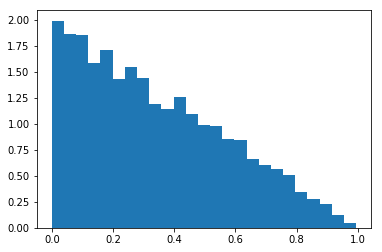

In [16]:
plt.hist(z, bins=25, density=True)

The distribution of the leftmost of the two rvs looks like:

$p(z) = 2(1-z)$

In [23]:
zz = np.linspace(0, 1, 1000)
pz = 2*(1-zz)

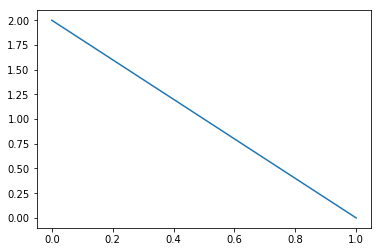

In [25]:
plt.plot(zz, pz)

This has an expectation

$E[Z] = \int_0^1zp(z)dz = \int_0^1 2z - 2z^2 dz$

$= \int_0^1 2z dz - \int_0^1 2z^2 dz$

$=z^2\Big|_0^1 - \frac{2}{3}z^3\Big|_0^1 = 1/3.$

**Exercise 2.6** [Variance of a sum] 

Show that the variance of a sum is

V[X +Y] = V[X]+V[Y]+2Cov[X,Y],

where Cov [X, Y ] is the covariance between X and Y.

We have 

$V[X] = E[X^2] + (E[X])^2$ 

and 

$\text{Cov}[XY] = E[XY] - E[X]E[Y].$

So, using the definition of variance,

$V[X+Y] = E[((X+Y) - E[X+Y])^2]
= E[(X+Y-E[X]-E[Y])^2]
=E[(X+Y-\mu_X-\mu_Y)^2]$

$=E[X^2 + XY - X\mu_X - X\mu_Y
  +Y^2 + XY - Y\mu_X - Y\mu_Y
  +X\mu_X - Y\mu_Y + \mu_X^2 + \mu_X\mu_Y
  -X\mu_Y - Y\mu_Y + \mu_X\mu_Y + \mu_Y^2]$
  
$=E[X^2] + E[Y^2] + 2E[XY] -2\mu_X^2 - 4\mu_X\mu_Y - 2\mu_Y^2 + \mu_X^2 + \mu_Y^2 + 2\mu_X\mu_Y$

$=2(E[XY]-E[X]E[Y]) + E[X^2] + E[Y^2] - (E[X])^2 - (E[Y])^2$

$=V[X] + V[Y] + 2\text{Cov}[XY]$

**Exercise 2.7** [Deriving the inverse gamma density *]

Let X ∼ Ga(a, b), and Y = 1/X . Derive the distribution of Y .

$X \sim \text{Ga}(a, b) = \frac{b^a}{\Gamma(a)}x^{a-1}e^{-xb}.$

For the distribution $Y \sim 1/X,$ we have:

$p_y(y) = p_x(g(y))\left|\frac{d(g(y))}{dy}\right|,$

where 

$g(y) = 1/y$ so that $p_x(g(y)) = \frac{b^a}{\Gamma(a)}(1/y)^{a-1}e^{-(1/y)b}.$

The derivative

$\frac{d}{dy}[y^{-1}] = -y^{-2},$

so that

$p_y(y) = |-y^{-2}|\frac{b^a}{\Gamma(a)}(1/y)^{a-1}e^{-(1/y)b}
        = y^{-2}\frac{b^a}{\Gamma(a)}y^{-(a-1)}e^{-b/y}
        = \frac{b^a}{\Gamma(a)}y^{-(a-1+2)}e^{-b/y}
        = \frac{b^a}{\Gamma(a)}y^{-(a+1)}e^{-b/y}
        = \text{IG}(y|a, b).$

**Exercise 2.8** [Mean, mode, variance for the beta distribution]

Suppose θ ∼ Beta(a, b). Show that the mean, mode and variance are given by

$E[\theta] = \frac{a}{a+b}$

$V[\theta] = \frac{ab}{(a+b)^2(a+b+1)}$

$\text{mode}[\theta] = \frac{a-1}{a+b-2}$

Since

$\text{Beta}(\theta|a, b) = \frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1},$

$E[\theta] = \int \theta\text{Beta}(\theta|a, b) d\theta$

$= \int \theta\frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1} d\theta$

$= \frac{1}{B(a,b)} \int \theta^{a}(1-\theta)^{b-1} d\theta$

**Exercise 2.10** [Legal reasoning]

(Source: Peter Lee.) Suppose a crime has been committed. Blood is found at the scene for which there is no
innocent explanation. It is of a type which is present in 1% of the population.

a. The prosecutor claims: “There is a 1% chance that the defendant would have the crime blood type if he were innocent. Thus there is a 99% chance that he is guilty”. This is known as the prosecutor’s fallacy. What is wrong with this argument?

b. The defender claims: “The crime occurred in a city of 800,000 people. The blood type would be found in approximately 8000 people. The evidence has provided a probability of just 1 in 8000 that the defendant is guilty, and thus has no relevance.” This is known as the defender’s fallacy. What is wrong with this argument?

a. This is confusing the probability that the defendant has the rare blood type with the probability that he is guilty.  This reasoning is obviously bad, as it should be equally applied to _anyone_ of the rare blood type.  It is not logically possible for everyone with the rare blood type to have a 99% probability of having committed the crime.

b. This is making an unjustified assumption that the probability of guilt is uniformly distributed over the population with the rare blood type.

**Exercise 2.11** [Probabilities are sensitive to the form of the question that was used to generate the answer *]

(Source: Minka.) My neighbor has two children. Assuming that the gender of a child is like a coin flip, it is most likely, a priori, that my neighbor has one boy and one girl, with probability 1/2. The other possibilities—two boys or two girls—have probabilities 1/4 and 1/4.

a. Suppose I ask him whether he has any boys, and he says yes. What is the probability that one child is a girl?

b. Suppose instead that I happen to see one of his children run by, and it is a boy. What is the probability that the other child is a girl?

Originally the probability distribution looks like:
    
|   |BB |BG |GB | GG|
|---|---|---|---|---|
|   |.25|.25|.25|.25|

a. We now know that he has at least one boy, so the updated distribution (without the possibility of two girls) reflecting this looks like:

|   |BB |BG |GB | GG|
|---|---|---|---|---|
|   |.33|.33|.33|0.0|

The probability of at least one child being a girl is then 0.33 + 0.33 = 0.66.

b. If instead we happen to see one child, a boy, the probability that the other child is the probability of a child being a girl, i.e., 0.50.  Going back to the original distribution, we can say that we saw "child \#1," i.e., the first letter of each of the column titles.  The updated distribution (with child \#1 a boy) then looks like:

|   |BB |BG |GB | GG|
|---|---|---|---|---|
|   |.50|.50|0.0|0.0|

Of course, we could instead say that we had seen "child \#2" and the result would remain the same with a different distribution:

|   |BB |BG |GB | GG|
|---|---|---|---|---|
|   |.50|0.0|.50|0.0|

**Exercise 2.12** [Normalization constant for a 1D Gaussian]

The normalization constant for a zero-mean Gaussian is given by

$Z = \int_a^b \exp \left(-\frac{x^2}{2\sigma^2}\right)dx$

where a = −∞ and b = ∞. To compute this, consider its square

$Z^2 = \int_a^b\int_a^b \exp \left(-\frac{x^2+y^2}{2\sigma^2}\right)dxdy$

Let us change variables from cartesian (x, y) to polar (r, θ) using x=r cos θ and y=r sin θ.

Since $dxdy = rdrd\theta$ and $\cos^2\theta+\sin^2\theta=1$, we have

$Z^2 = \int_0^{2\pi}\int_0^{\infty} r \exp \left(-\frac{r^2}{2\sigma^2}\right)drd\theta$

Evaluate this integral and show

$Z = \sqrt{\sigma^2 2 \pi}.$

Separating the integral into two parts:

$Z^2 = \int_0^{2\pi}\int_0^{\infty} r \exp \left(-\frac{r^2}{2\sigma^2}\right)drd\theta
= \int_0^{\infty} r \exp \left(-\frac{r^2}{2\sigma^2}\right)dr \int_0^{2\pi} d\theta
,$

we have that 

$Z^2 = 2\pi \int_0^{\infty} r \exp \left(-\frac{r^2}{2\sigma^2}\right)dr.$

We also see (using the chain rule) that

$\frac{d}{dr} \exp \left(-\frac{r^2}{2\sigma^2}\right) = -\frac{r}{\sigma^2}\exp \left(-\frac{r^2}{2\sigma^2}\right),$

so that

$r \exp \left(-\frac{r^2}{2\sigma^2}\right) = -\sigma^2 \frac{d}{dr} \exp \left(-\frac{r^2}{2\sigma^2}\right).$

This gives us that 

$Z^2 = - 2\pi\sigma^2 \int_0^{\infty}\frac{d}{dr} \exp \left(-\frac{r^2}{2\sigma^2}\right) dr 
= - 2\pi\sigma^2 \exp \left(-\frac{r^2}{2\sigma^2}\right)\Big|_{r=0}^{r=\infty},$

since 

$\int \frac{df(z)}{dz} dz = f(z).$

Evaluating the integral:

$\exp \left(-\frac{r^2}{2\sigma^2}\right)\Big|_{r=0}^{r=\infty} = [0 - 1] = -1,$

giving

$Z^2 = 2\pi\sigma^2$ and $Z = \sqrt{2\pi\sigma^2}.$